<a href="https://colab.research.google.com/github/MalePalma/Ingenias-Data/blob/main/Segunda_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de datos de Encuesta Mundial de Salud Escolar

### Grupo 9
Integrantes:
- Cruz, Ruth
- Gabis Leccesi, Luciana
- Garnica, Rocío
- Gonzalez Navarro, Sol
- Palma, Malena Agustina
- Vidal, Teresa
- Stachoni, Yanina

**Dataset seleccionado:**
- Resultados encuesta EMSE
- Origen de datos: https://datos.gob.ar/ar/dataset/salud-base-datos-3deg-encuesta-mundial-salud-escolar-emse-con-resultados-nacionales-argentina

La Encuesta Mundial de Salud Escolar (EMSE) utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alcohol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el con- sumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección

**Objetivos:**
* La EMSE abarca muchas temáticas con más de 70 preguntas. Para nuestro estudio decidimos enforcarnos en temas de violencia y daños no intencionados, persiguiendo los siguientes objetivos:
* * Detectar patrones en niños y niñas que han sido víctimas de intimidación, considerando relaciones familiares y con amigos, datos físicos y sociodemográficos.
  * Detectar diferencias en los distintos tipos de intimidación (en escuela, fuera del ámbito escolar, vía internet).
  * Predecir victimas de intimidación.




In [1]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

-------------
Para poder centrarnos en el análisis de los datos que nos resultan relevantes, primero analizamos todas las preguntas y seleccionamos aquellas con las que vamos a trabajar, pudiendo ampliar el análisis luego.

In [3]:
#Leemos Excel creado con el analisis de las preguntas que son de interes
df_conf = pd.read_excel("Analisis Preguntas.xlsx")
print(f"Filas y columnas totales: {df_conf.shape}")
df_conf.head()

Filas y columnas totales: (75, 4)


,Id Pregunta,Pregunta,Relevante,Nombre Columna
0,texto_q1,Edad,Si,edad
1,texto_q2,Sexo,Si,sexo
2,texto_q3,Grado o Año,Si,grado
3,q4,Estatura,Si,altura
4,q5,Peso,Si,peso


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Armamos configuracion de columnas a cargar del dataset
df_conf = df_conf[df_conf["Relevante"] == "Si"]
print(f"Cantidad de preguntas de interés para el análisis: {df_conf.shape[0]}")
columnas_a_leer = df_conf["Id Pregunta"].values
print(f"Columnas a leer: {columnas_a_leer}")
columnas_nombres = df_conf["Nombre Columna"].values
print(f"Título de las columnas: {columnas_nombres}")

Cantidad de preguntas de interés para el análisis: 41
Columnas a leer: ['texto_q1' 'texto_q2' 'texto_q3' 'q4' 'q5' 'texto_q6' 'texto_q16'
 'texto_q17' 'texto_q18' 'texto_q19' 'texto_q22' 'texto_q23' 'texto_q24'
 'texto_q26' 'texto_q27' 'texto_q28' 'texto_q29' 'texto_q33' 'texto_q34'
 'texto_q35' 'texto_q39' 'texto_q40' 'texto_q44' 'texto_q45' 'texto_q49'
 'texto_q51' 'texto_q53' 'texto_q54' 'texto_q55' 'texto_q56' 'texto_q57'
 'texto_q58' 'texto_q59' 'texto_q60' 'texto_q68' 'texto_q76' 'texto_q80'
 'texto_q81' 'texto_qnunwtg' 'texto_qnowtg' 'texto_qnobeseg']
Título de las columnas: ['edad' 'sexo' 'grado' 'altura' 'peso' 'hambre' 'participar_pelea'
 'cantidad_lesiones' 'tipo_lesion' 'causa_lesion' 'sentir_soledad'
 'sentir_preocupacion' 'pensar_suicidio' 'intentar_suicidio'
 'amigos_cercanos' 'edad_cigarrillo' 'dias_fumar' 'padres_fuman'
 'edad_alcohol' 'dias_tomar_alcohol' 'problemas_alcohol' 'edad_drogas'
 'relaciones_sexuales' 'edad_relaciones_sexuales' 'dias_act_fisica'
 'dias_clase

In [7]:
#Ahora si importamos el dataset con las columanas preseleccionadas
df = pd.read_csv("EMSE_DatosAbiertos.csv", usecols=columnas_a_leer)
df.shape

(547, 41)

In [8]:
#Asignamos los nuevos nombres de columnas
df.columns = columnas_nombres
df.head()

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Dato perdido,Terciario/Universitario completo,Primaria completa,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Nunca,Secundario incompleto,Secundario incompleto,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Nunca,Primaria completa,Primaria incompleta,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido


## Análisis exploratorio de datos

In [9]:
#Conocemos cantidad de filas y columnas del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {format(filas,',').replace(',','.')} filas y {columnas} columnas")

El DataFrame tiene 547 filas y 41 columnas


In [10]:
#Vemos algunas filas del df
#Las primeras 10 filas
df.head(10)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Dato perdido,Terciario/Universitario completo,Primaria completa,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Nunca,Secundario incompleto,Secundario incompleto,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Nunca,Primaria completa,Primaria incompleta,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
5,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1 vez,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Nunca,Secundario completo,Terciario/Universitario incompleto,No,Probablemente no,Rara vez,Siempre,No,No,No
6,14 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Secundario completo,Secundario completo,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
7,12 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
8,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Casi siempre,2 o 3 veces,2 o 3 veces,Me sucedió otra cosa,Me caí,...,Algunas veces,Secundario incompleto,Secundario completo,No,Probablemente sí,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
9,14 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Terciario/Universitario completo,Secundario completo,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [11]:
# 3 filas aleatoreas
df.sample(3)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
309,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Dato perdido,Primaria incompleta,Primaria incompleta,No,Definitivamente no,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
361,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,2 o 3 veces,Me sucedió otra cosa,Otra cosa causó mi lesión,...,Nunca,Primaria completa,Primaria incompleta,No,Probablemente sí,Algunas veces,Dato perdido,Dato perdido,Dato perdido,Dato perdido
188,15 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,No sé,No sé,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [12]:
# Las últimas 5 filas
df.tail(5)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
542,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.30,65.0,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Primaria completa,Primaria completa,No,Definitivamente no,Nunca,Nunca,No,Si,Si
543,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Primaria completa,No,Definitivamente no,Nunca,Nunca,Dato perdido,Dato perdido,Dato perdido
544,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Dato perdido,No sé,Primaria completa,No,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
545,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,1.67,58.0,Nunca,Ninguna,Dato perdido,Dato perdido,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente sí,Nunca,Nunca,No,No,No
546,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ningu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Conocemos tipo de datos y cantidad de no nulos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       545 non-null    object 
 1   sexo                       547 non-null    object 
 2   grado                      547 non-null    object 
 3   altura                     305 non-null    float64
 4   peso                       305 non-null    float64
 5   hambre                     547 non-null    object 
 6   participar_pelea           547 non-null    object 
 7   cantidad_lesiones          547 non-null    object 
 8   tipo_lesion                547 non-null    object 
 9   causa_lesion               547 non-null    object 
 10  sentir_soledad             546 non-null    object 
 11  sentir_preocupacion        546 non-null    object 
 12  pensar_suicidio            546 non-null    object 
 13  intentar_suicidio          546 non-null    object 

**_Vemos que en la mayoría de las columnas categóricas aparenta no haber datos nulos, vamos a evaluar sus opciones para ver si alguna de ellas se corresponde con un valor nulo_**

In [14]:
print(f"Valores en grado: {df.grado.unique()}")
for columna in df.iloc[:,4:].columns:
    print(f"Valores en {columna}: {df[columna].unique()}")

Valores en grado: ['9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 'Dato perdido'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
Valores en peso: [ nan  56.  70.  48.  45.  40.  52.  92.  47.  62.  68.  59.  41.  60.
  53.  51.  58.  32.  54.  44.  49.  75.  50.  55.  61. 122.  73.  82.
  81.  72.  63.  76.  43.  57.  67.  84.  42.  46.  64.  69.  74.  71.
 105.  85.  65.  66.  39.  78.  99.  83.  98.  38. 135. 146.  35.  80.
  95.  86. 100.  97. 158.]
Valores en hambre: ['Rara vez' 'Nunca' 'Algunas veces' 'Casi siempre' 'Siempre'
 'Dato perdido']
Valores en participar_pelea: ['Ninguna' '2 o 3 veces' '1 vez' '4 o 5 veces' '8 o 9 veces'
 'Dato perdido' '6 o 7 veces' '12 o más veces' '10 u 11 veces']
Valores en cantidad_lesiones: ['Ninguna' '2 o 3 veces' 'Dato

> Vemos que los valores que no tienen información figuran como "Dato perdido", reemplazamos este valor por np.Nan para poder analizar nulos en conjunto y tratarlos según corresponda

In [15]:
df.replace("Dato perdido", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       545 non-null    object 
 1   sexo                       539 non-null    object 
 2   grado                      538 non-null    object 
 3   altura                     305 non-null    float64
 4   peso                       305 non-null    float64
 5   hambre                     542 non-null    object 
 6   participar_pelea           545 non-null    object 
 7   cantidad_lesiones          507 non-null    object 
 8   tipo_lesion                514 non-null    object 
 9   causa_lesion               509 non-null    object 
 10  sentir_soledad             545 non-null    object 
 11  sentir_preocupacion        544 non-null    object 
 12  pensar_suicidio            538 non-null    object 
 13  intentar_suicidio          540 non-null    object 

>  Notamos que el dato "Edad" figura como `object` en lugar de algún tipo `numérico`. Analizamos sus valores para intentar transformarlo a número.

In [16]:
df.edad.unique()

array(['13 años', '14 años', '16 años', '12 años', '15 años',
       '11 años o menos', '17 años', nan, '18 años o más'], dtype=object)

- Con una expresión regular seleccionamos todos los caracteres entre la `a` y la `z`, incluimos la `ñ`, la `á` y espacios.
- Reemplazamos todos esos caracteres por vacío `''`

In [17]:
#Reemplazo de caracteres por ''
df.edad.replace(r'[a-zñá ]', '', regex=True, inplace=True)
#Convertimos ahora la columna a numérica
df.edad = pd.to_numeric(df.edad)
df.edad

0      13.0
1      13.0
2      14.0
3      16.0
4      13.0
       ... 
542    13.0
543    13.0
544    13.0
545    13.0
546    13.0
Name: edad, Length: 547, dtype: float64

## Análisis de datos nulos y outliers

In [18]:
#Generamos una tabla con valor y cantidad de nulos por columna, ordenado descendente desde mayor porcentaje
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
obeso,242,44.24,object
sobre_peso,242,44.24,object
altura,242,44.24,float64
peso,242,44.24,float64
bajo_peso,242,44.24,object
cantidad_lesiones,40,7.31,object
causa_lesion,38,6.95,object
tipo_lesion,33,6.03,object
edad_alcohol,32,5.85,object
edad_drogas,27,4.94,object


In [19]:
#Analizamos datos estadísticos de las columnas numéricas con datos nulos
datos_numericos = df[["altura","peso","edad"]].describe().T
datos_numericos["moda"] = df[["altura","peso","edad"]].mode().T
datos_numericos.rename(columns={"mean":"media", "50%": "mediana"}, inplace=True)
datos_numericos

,count,media,std,min,25%,mediana,75%,max,moda
altura,305.0,1.627016,0.091902,1.3,1.56,1.63,1.69,1.9,1.6
peso,305.0,60.426230,15.376053,32.0,51.00,58.00,67.00,158.0,52.0
edad,545.0,14.704587,1.333559,11.0,14.00,15.00,16.00,18.0,15.0


- Para `altura` y `edad` vemos que tienen una desviación estándar baja, por lo tanto los valores se ubican cerca de la media
- También notamos ques los valores de media, mediana y moda son similares por lo que tendrían una distribución de frecuencias simétrica.
- Hacemos un gráfico para comprobarlo

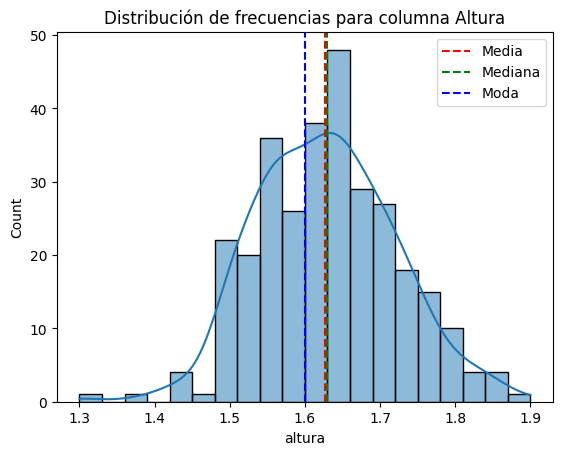

In [20]:
fig = sns.histplot(df, x="altura", kde=True, bins=20)
fig.axvline(datos_numericos.loc["altura"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["altura"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["altura"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Altura")
fig.legend()

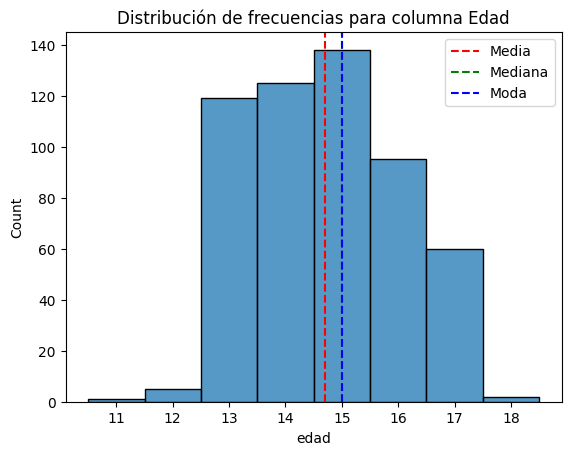

In [21]:
fig = sns.histplot(df, x="edad", discrete=True)
fig.axvline(datos_numericos.loc["edad"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["edad"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["edad"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Edad")
fig.legend()

**_Para los dos casos, rellenamos nulos con el valor de la mediana_**

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df.altura = imputer.fit_transform(df[['altura']])
df.edad = imputer.fit_transform(df[['edad']])
df[["altura","edad"]].describe()

,altura,edad
count,547.000000,547.000000
mean,1.628336,14.705667
std,0.068591,1.331234
min,1.300000,11.000000
25%,1.620000,14.000000
50%,1.630000,15.000000
75%,1.640000,16.000000
max,1.900000,18.000000


- Analizamos la dispersión y outliers para el caso de la columna `peso`. Ya que al tener una desviación estándar alta, los datos se asume que están dispersos. Con una media, moda y mediana cercanos pero con un sesgo a la derecha ya que la media (60.21) es mayor a la mediana (58)

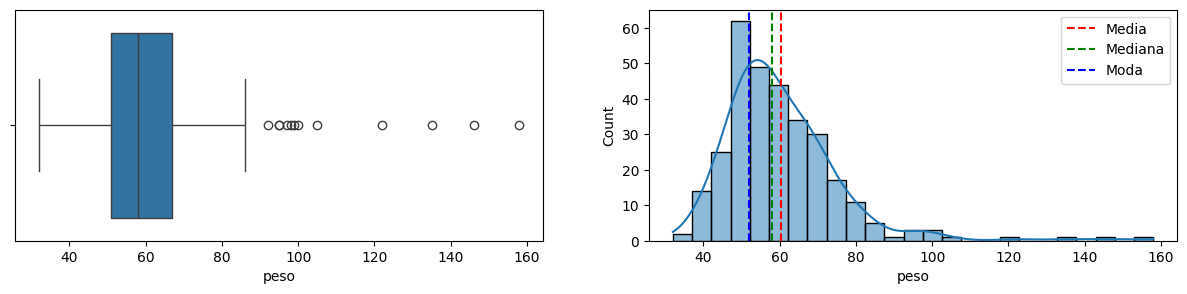

In [23]:
#Grafico de bigotes e histograma para evaluar la dispersión
f, (ax_box, ax_hist) = plt.subplots(1,2, figsize=(15, 3), sharex=False, sharey=False)

sns.boxplot(data=df, x="peso", ax=ax_box)

sns.histplot(data=df, x="peso", ax=ax_hist, bins=25, kde=True)

ax_hist.axvline(datos_numericos.loc["peso"].media, color='r', linestyle='--', label="Media")
ax_hist.axvline(datos_numericos.loc["peso"].mediana, color='g', linestyle='--', label="Mediana")
ax_hist.axvline(datos_numericos.loc["peso"].moda, color='b', linestyle='--', label="Moda")
ax_hist.legend()


plt.show()

Filas no nulas df original: 305
Filas no nulas sin outliers: 293
Filas removidas: 12
Medidas estadísticas originales
count    305.000000
mean      60.426230
std       15.376053
min       32.000000
25%       51.000000
50%       58.000000
75%       67.000000
max      158.000000
Name: peso, dtype: float64
Medidas estadísticas sin outliers
count    293.000000
mean      58.320819
std       10.662931
min       32.000000
25%       51.000000
50%       57.000000
75%       66.000000
max       86.000000
Name: peso, dtype: float64


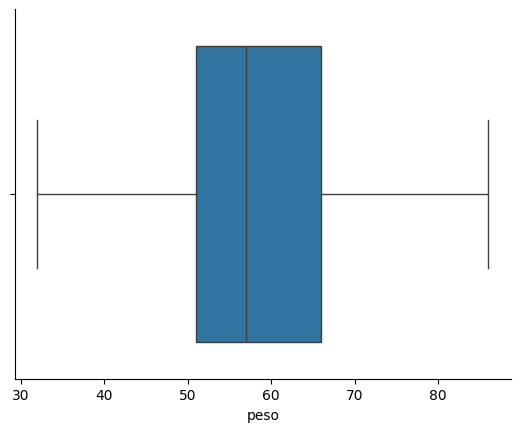

In [24]:
#Analizamos cuantos son los outliers y como cambia la descripción estadística de la columna sin ellos
q1, q3 = df["peso"].quantile([.25, .75])
ric = q3 - q1 #rango inter quartil
l_inf = q1 - 1.5 * ric
l_sup = q3 + 1.5 * ric
df_sin_outliers = df[df["peso"].between(l_inf, l_sup)]
print(f"Filas no nulas df original: {df.peso.count()}")
print(f"Filas no nulas sin outliers: {df_sin_outliers.peso.count()}")
print(f"Filas removidas: {df.peso.count() - df_sin_outliers.peso.count()}")
print("Medidas estadísticas originales")
print(df.peso.describe().T)
print("Medidas estadísticas sin outliers")
print(df_sin_outliers.peso.describe().T)
sns.boxplot(data=df_sin_outliers, x="peso")
sns.despine()

> Como el porcentaje de datos removidos es chico (2% --> 1174 filas en 56981 del total de filas), removemos los outliers y rellenamos nulos con la media

In [25]:
df = df_sin_outliers
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df.peso = imputer.fit_transform(df[['peso']])
df[["peso"]].describe()

<ipython-input-25-418dd5b4cf60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.peso = imputer.fit_transform(df[['peso']])


,peso
count,293.000000
mean,58.320819
std,10.662931
min,32.000000
25%,51.000000
50%,57.000000
75%,66.000000
max,86.000000


- Como `obeso`, `bajo_peso` y `sobre_peso` están calculados a partir de una fórmula que desconocemos y tienen alto porcentaje en datos nulos eliminaremos esas columnas.

In [26]:
df.drop(columns=["obeso", "bajo_peso","sobre_peso"], inplace=True)
df.columns

Index(['edad', 'sexo', 'grado', 'altura', 'peso', 'hambre', 'participar_pelea',
       'cantidad_lesiones', 'tipo_lesion', 'causa_lesion', 'sentir_soledad',
       'sentir_preocupacion', 'pensar_suicidio', 'intentar_suicidio',
       'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar', 'padres_fuman',
       'edad_alcohol', 'dias_tomar_alcohol', 'problemas_alcohol',
       'edad_drogas', 'relaciones_sexuales', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'intimidacion_internet', 'amigos_alcohol',
       'sentir_ridiculo', 'padres_expectativas_altas'],
      dtype='object')

In [27]:
#Volvemos a analizar nulos con los cambios hechos hasta ahora
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
causa_lesion,22,7.51,object
cantidad_lesiones,21,7.17,object
tipo_lesion,17,5.80,object
edad_alcohol,14,4.78,object
edad_drogas,13,4.44,object
relaciones_sexuales,10,3.41,object
padres_revisar,9,3.07,object
padres_atencion,9,3.07,object
edad_relaciones_sexuales,9,3.07,object
padres_tiempo_libre,8,2.73,object


**_Todos los datos faltantes se corresponden con columnas categóricas. Utilizaremos un método de relleno basado en el siguiente valor para las columnas con un porcentaje mayor de datos faltantes y el resto rellenaremos con el `más frecuente`_**

In [28]:
df.cantidad_lesiones.ffill(inplace=True)
df.causa_lesion.ffill(inplace=True)
df.tipo_lesion.ffill(inplace=True)
df[["cantidad_lesiones","causa_lesion","tipo_lesion"]].isnull().sum()

cantidad_lesiones    0
causa_lesion         0
tipo_lesion          0
dtype: int64

In [29]:
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
edad_alcohol,14,4.78,object
edad_drogas,13,4.44,object
relaciones_sexuales,10,3.41,object
padres_revisar,9,3.07,object
padres_atencion,9,3.07,object
edad_relaciones_sexuales,9,3.07,object
madre_educacion,8,2.73,object
padres_tiempo_libre,8,2.73,object
padres_expectativas_altas,7,2.39,object
sentir_ridiculo,7,2.39,object


In [30]:
#Llenamos los nulos con la opción más frecuente.
imputer_frequent = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [31]:
for columna in df_info_nulos[df_info_nulos["Porcentaje"] > 0].index:
    datos_imputados = imputer_frequent.fit_transform(df[[columna]])
    df[columna] =  datos_imputados[:,0]


In [32]:
#Chequeamos que no queden nulos
df.isnull().sum()

edad                         0
sexo                         0
grado                        0
altura                       0
peso                         0
hambre                       0
participar_pelea             0
cantidad_lesiones            0
tipo_lesion                  0
causa_lesion                 0
sentir_soledad               0
sentir_preocupacion          0
pensar_suicidio              0
intentar_suicidio            0
amigos_cercanos              0
edad_cigarrillo              0
dias_fumar                   0
padres_fuman                 0
edad_alcohol                 0
dias_tomar_alcohol           0
problemas_alcohol            0
edad_drogas                  0
relaciones_sexuales          0
edad_relaciones_sexuales     0
dias_act_fisica              0
dias_clase_ef                0
dias_falta_clases            0
otros_amables                0
padres_tarea                 0
padres_atencion              0
padres_tiempo_libre          0
padres_revisar               0
padre_ed

In [33]:
#Guardamos nuevo csv con el DataFrame sin datos nulos
df.to_csv("EMSE_DatosAnalisisBullying.csv", index=False)

## Transformación de datos categóricos

## Gráficos

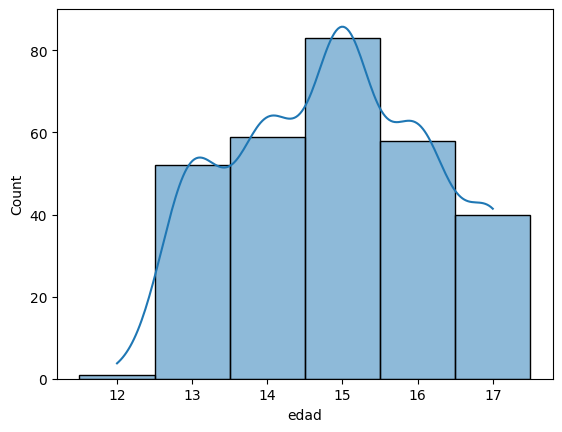

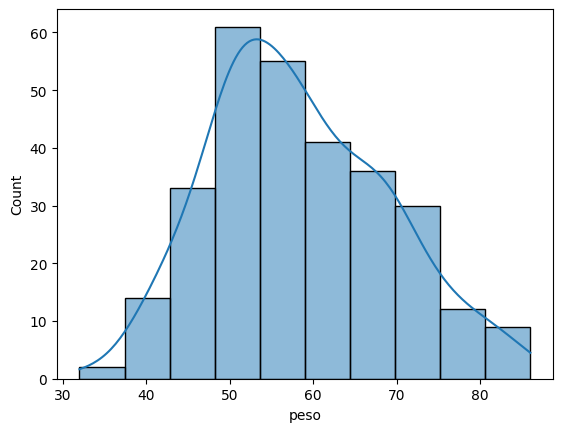

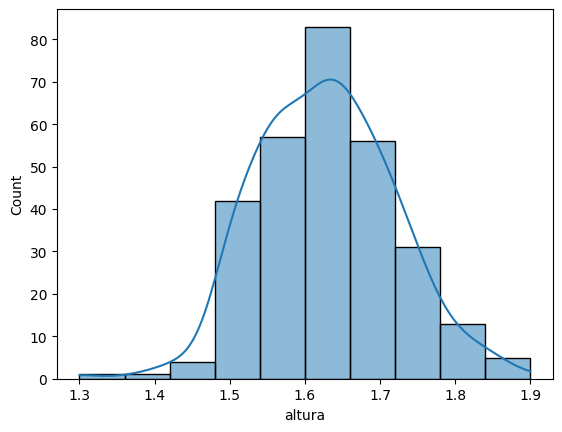

In [34]:
#Gráfico de densidad de las columnas numéricas
sns.histplot(df.edad,discrete=True, kde=True)
plt.show()
sns.histplot(df.peso, bins = 10,kde=True)
plt.show()
sns.histplot(df.altura, bins = 10,kde=True)
plt.show()

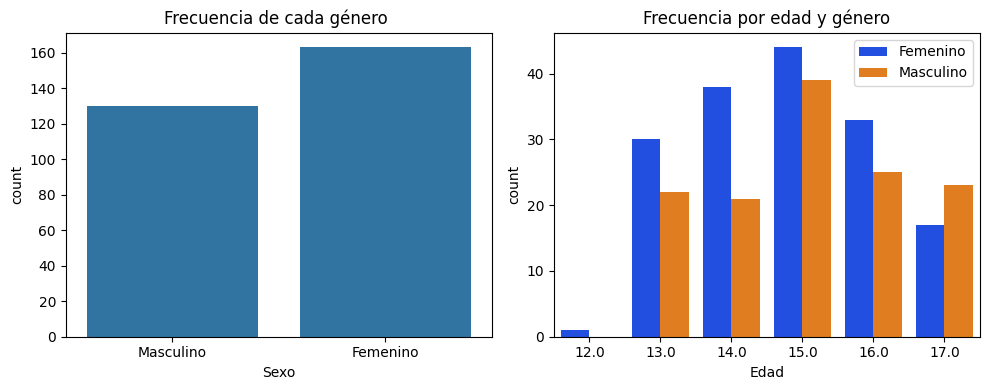

In [35]:
#Frecuencia por edad y sexo
fig, axes = plt.subplots(1,2, figsize=(10, 4))

# Trazar el primer gráfico en el primer eje
sns.countplot(data=df, x="sexo", ax=axes[0])
axes[0].set_xlabel('Sexo')
axes[0].set_title('Frecuencia de cada género ')

# Trazar el segundo gráfico en el segundo eje
sns.countplot(data=df, x="edad", hue="sexo", palette="bright",  ax=axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_title('Frecuencia por edad y género')
axes[1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()
